In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, model_selection, linear_model, metrics, pipeline, ensemble, tree
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.combine import SMOTEENN

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Read Data

In [4]:
# Read data from csv's
train_df = pd.read_csv('group/train.csv', index_col='policy_id')
test_df = pd.read_csv('group/test.csv', index_col='policy_id')

train_df

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
policy_id,,,,,,,,,,,,,,,,,,,,,
ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,91Nm@4250rpm,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0


# Data Overview

In [6]:
#to get name of the columns, their data types, whether there are missing values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58592 entries, ID00001 to ID58592
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  object 
 4   population_density                58592 non-null  int64  
 5   make                              58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  a

In [8]:
#to get summary statistics
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
policy_tenure,58592.0,0.611246,0.414156,0.002735,0.210250,0.573792,1.039104,1.396641
age_of_car,58592.0,0.069424,0.056721,0.000000,0.020000,0.060000,0.110000,1.000000
age_of_policyholder,58592.0,0.469420,0.122886,0.288462,0.365385,0.451923,0.548077,1.000000
population_density,58592.0,18826.858667,17660.174792,290.000000,6112.000000,8794.000000,27003.000000,73430.000000
make,58592.0,1.763722,1.136988,1.000000,1.000000,1.000000,3.000000,5.000000
airbags,58592.0,3.137066,1.832641,1.000000,2.000000,2.000000,6.000000,6.000000
displacement,58592.0,1162.355851,266.304786,796.000000,796.000000,1197.000000,1493.000000,1498.000000
cylinder,58592.0,3.626963,0.483616,3.000000,3.000000,4.000000,4.000000,4.000000
gear_box,58592.0,5.245443,0.430353,5.000000,5.000000,5.000000,5.000000,6.000000
turning_radius,58592.0,4.852893,0.228061,4.500000,4.600000,4.800000,5.000000,5.200000


In [9]:
# Check for missing values
missing_values = train_df.isnull().sum()
missing_values[missing_values != 0]

Series([], dtype: int64)

In [10]:
# Check for duplicates
duplicates = train_df.duplicated()
train_df[duplicates]

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
policy_id,,,,,,,,,,,,,,,,,,,,,


In [11]:
# Split max_torque by @ and store in a new column
train_df[["max_torque_Nm", "max_torque_rpm"]] = train_df["max_torque"].str.split("@", expand=True)
train_df.drop(columns=["max_torque"], inplace=True)

# Make max_torque_Nm and max_torque_rpm are float
train_df['max_torque_Nm'] = train_df['max_torque_Nm'].str.replace('Nm', '').astype(float)
train_df['max_torque_rpm'] = train_df['max_torque_rpm'].str.replace('rpm', '').astype(float)

# Split max_power by @ and store in a new column
train_df[["max_power_bhp", "max_power_rpm"]] = train_df["max_power"].str.split("@", expand=True)
train_df.drop(columns=["max_power"], inplace=True)

# Make max_power_bhp and max_power_rpm are float
train_df['max_power_bhp'] = train_df['max_power_bhp'].str.replace('bhp', '').astype(float)
train_df['max_power_rpm'] = train_df['max_power_rpm'].str.replace('rpm', '').astype(float)


In [13]:
# Get only object columns
number_columns = train_df.select_dtypes(include='number')
object_columns = train_df.select_dtypes(include='object')

# Get only columns starts with is_
boolean_columns_df = object_columns.filter(like='is_')
boolean_columns_df

# Get only columns which not starts with is_
categorical_columns_df = object_columns.drop(columns=boolean_columns_df.columns)
categorical_columns_df

# Validate if the sum of the boolean and categorical columns equals the total number of object columns
boolean_columns_df.shape[1] + categorical_columns_df.shape[1] == object_columns.shape[1]

,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
policy_id,,,,,,,,,,,,,,,,,
ID00001,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,Yes
ID00002,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,Yes
ID00003,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,Yes
ID00004,Yes,Yes,No,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
ID00005,No,No,No,No,Yes,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID58588,No,No,No,No,Yes,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes
ID58589,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,Yes
ID58590,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,Yes


,area_cluster,segment,model,fuel_type,engine_type,rear_brakes_type,transmission_type,steering_type
policy_id,,,,,,,,
ID00001,C1,A,M1,CNG,F8D Petrol Engine,Drum,Manual,Power
ID00002,C2,A,M1,CNG,F8D Petrol Engine,Drum,Manual,Power
ID00003,C3,A,M1,CNG,F8D Petrol Engine,Drum,Manual,Power
ID00004,C4,C1,M2,Petrol,1.2 L K12N Dualjet,Drum,Automatic,Electric
ID00005,C5,A,M3,Petrol,1.0 SCe,Drum,Automatic,Electric
...,...,...,...,...,...,...,...,...
ID58588,C8,A,M3,Petrol,1.0 SCe,Drum,Automatic,Electric
ID58589,C14,A,M1,CNG,F8D Petrol Engine,Drum,Manual,Power
ID58590,C5,A,M1,CNG,F8D Petrol Engine,Drum,Manual,Power


True

In [14]:
# Ordinal colums
ordinal_colums = [
    "segment",
    "model",
]
dummy_columns = [
    "area_cluster",
    "fuel_type",
    "engine_type",
    "rear_brakes_type",
    "transmission_type",
    "steering_type",
    *boolean_columns_df.columns,
]

ordinal_colums, dummy_columns

(['segment', 'model'],
 ['area_cluster',
  'fuel_type',
  'engine_type',
  'rear_brakes_type',
  'transmission_type',
  'steering_type',
  'is_esc',
  'is_adjustable_steering',
  'is_tpms',
  'is_parking_sensors',
  'is_parking_camera',
  'is_front_fog_lights',
  'is_rear_window_wiper',
  'is_rear_window_washer',
  'is_rear_window_defogger',
  'is_brake_assist',
  'is_power_door_locks',
  'is_central_locking',
  'is_power_steering',
  'is_driver_seat_height_adjustable',
  'is_day_night_rear_view_mirror',
  'is_ecw',
  'is_speed_alert'])

# Visualize data

In [15]:
df = train_df.copy()

for col in dummy_columns + ordinal_colums:
    df[col] = preprocessing.LabelEncoder().fit(train_df[col]).transform(train_df[col])

In [16]:
df_is_claim = df[df["is_claim"] == 1]
df_is_not_claim = df[df["is_claim"] == 0]

In [17]:
len(number_columns.columns)

20

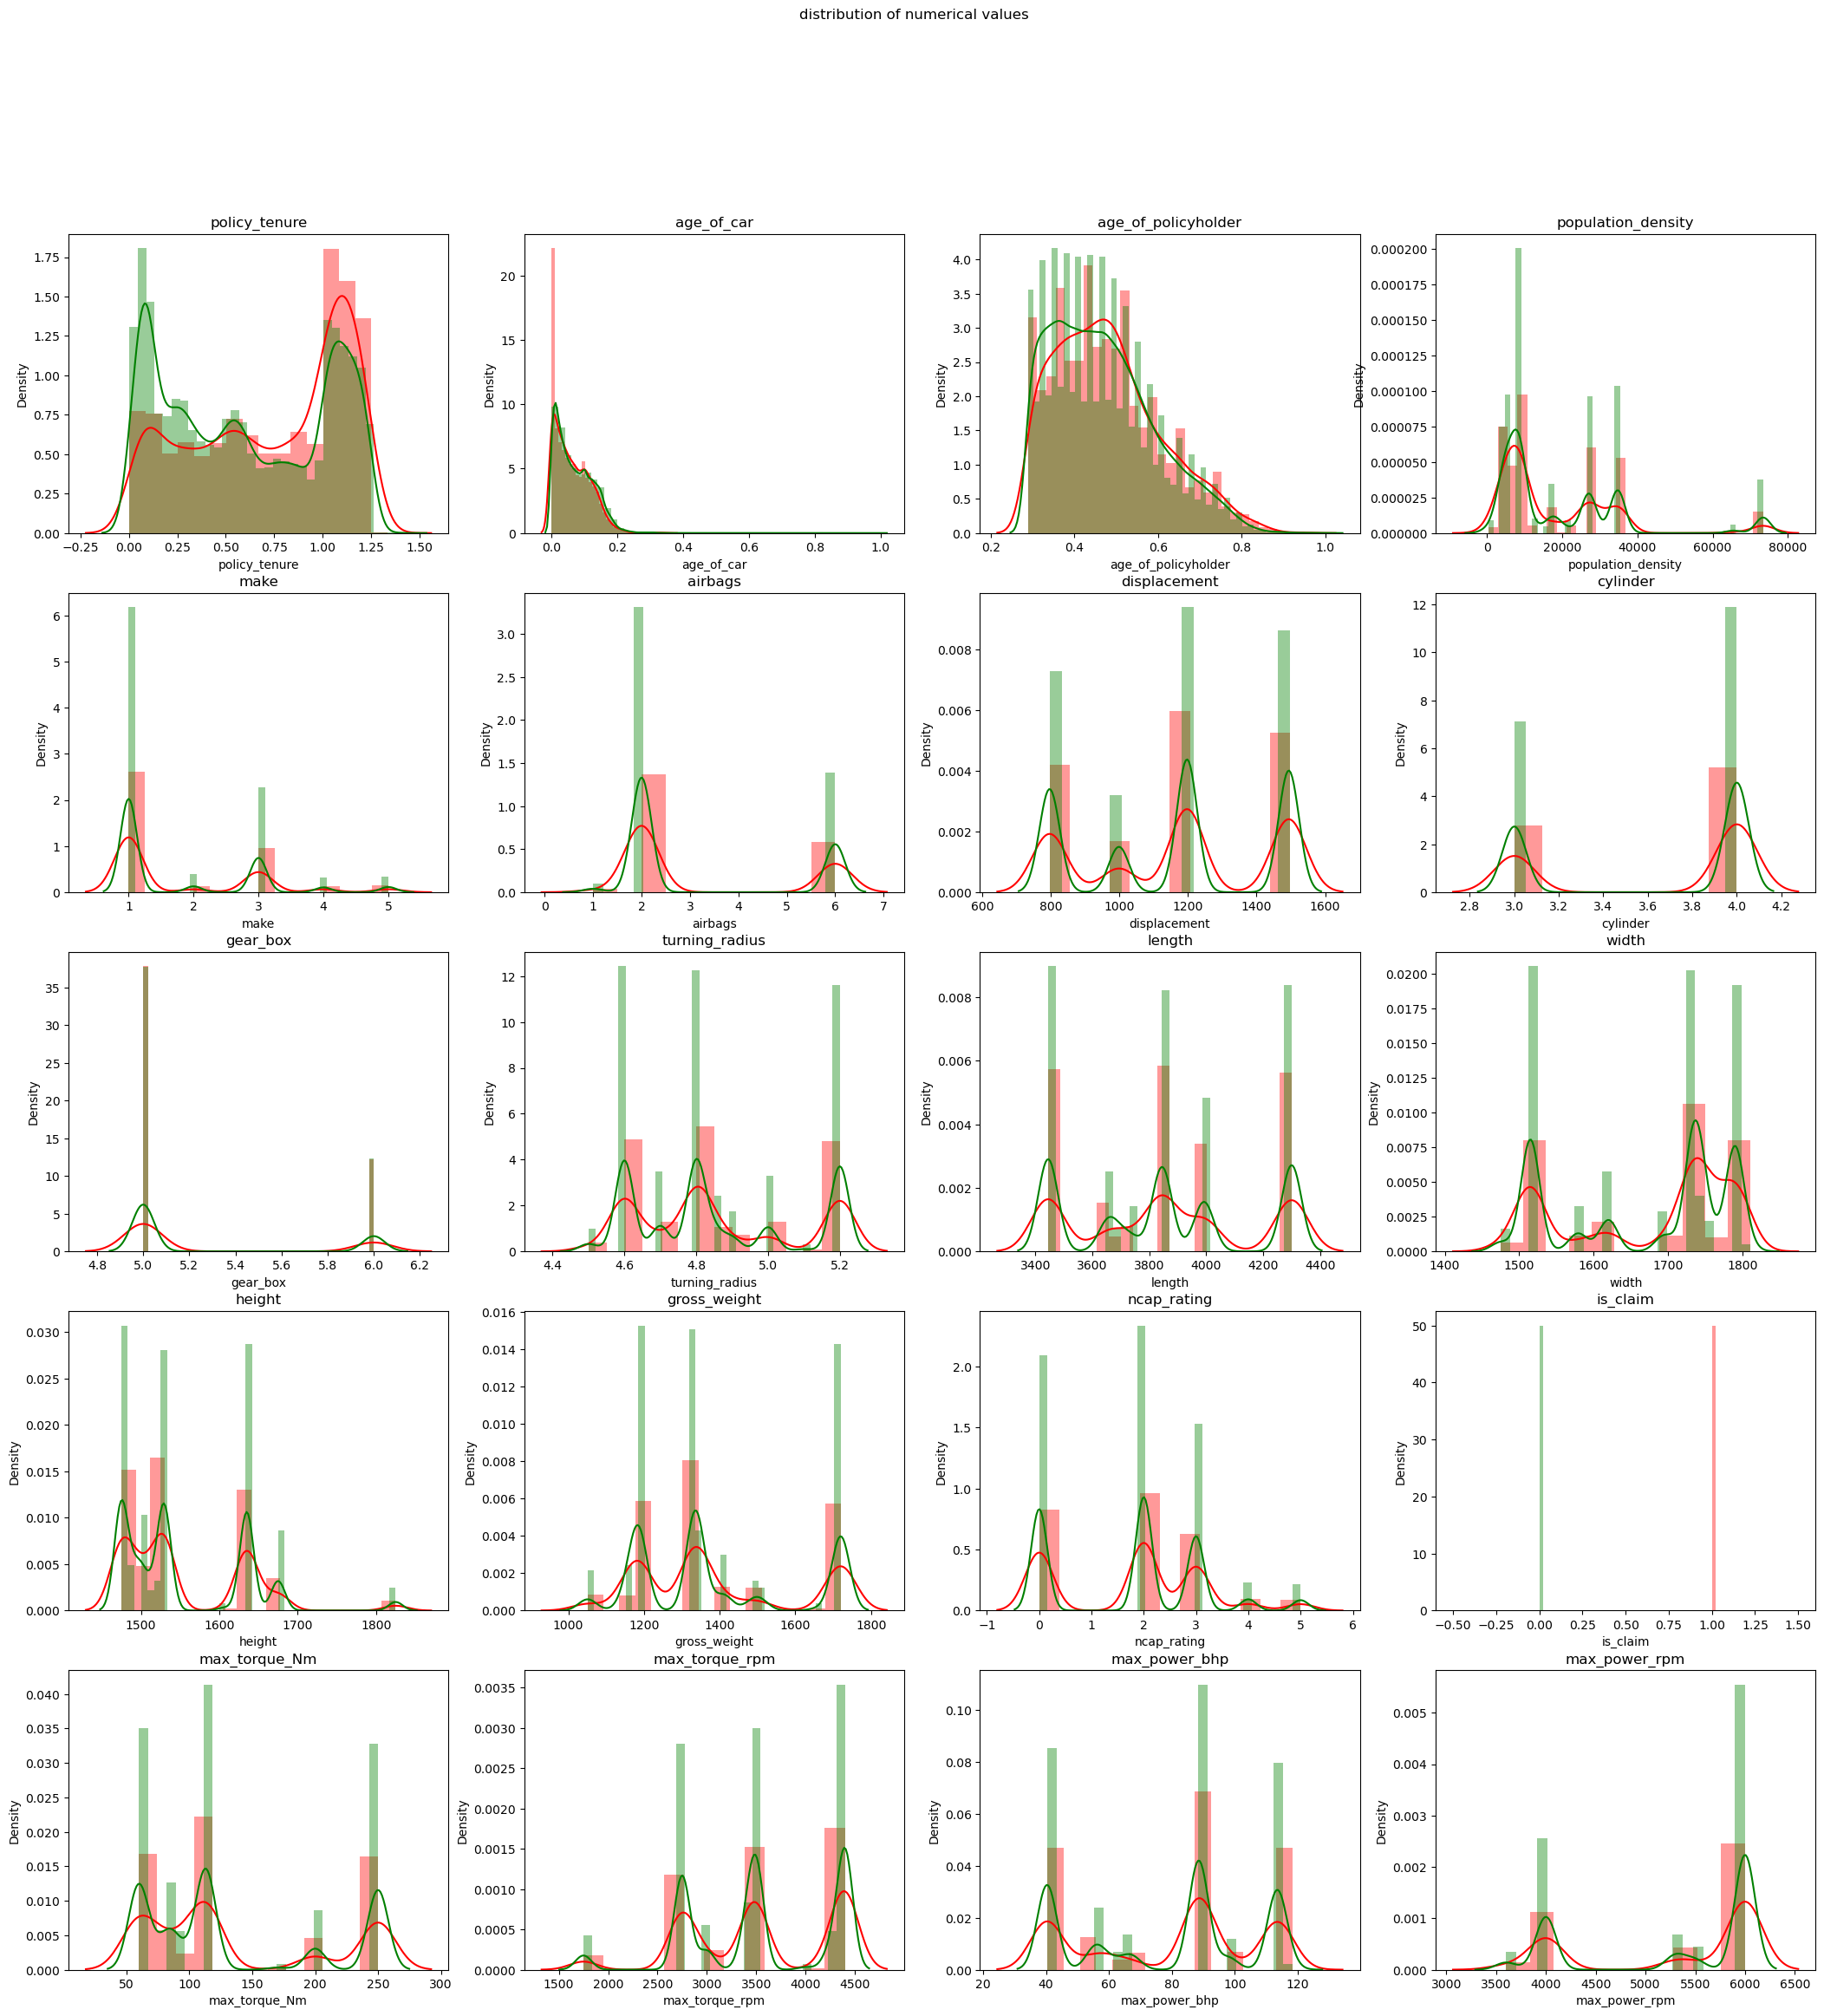

In [22]:
#make a plot for each numerical column, where "red" is for is_claim and "green" is for is_not_claim
import warnings
warnings.filterwarnings("ignore")

_ = plt.figure(figsize=(26,26))
_ = plt.tight_layout()
_ = plt.suptitle("distribution of numerical values")

for k, col in enumerate(df.loc[:, number_columns.columns], start=1):
    ax = plt.subplot(5, 4, k)
    _ = sns.distplot(df_is_claim[col], color="red", ax=ax)
    _ = sns.distplot(df_is_not_claim[col], color="green", ax=ax)
    _ = plt.title(col)

25

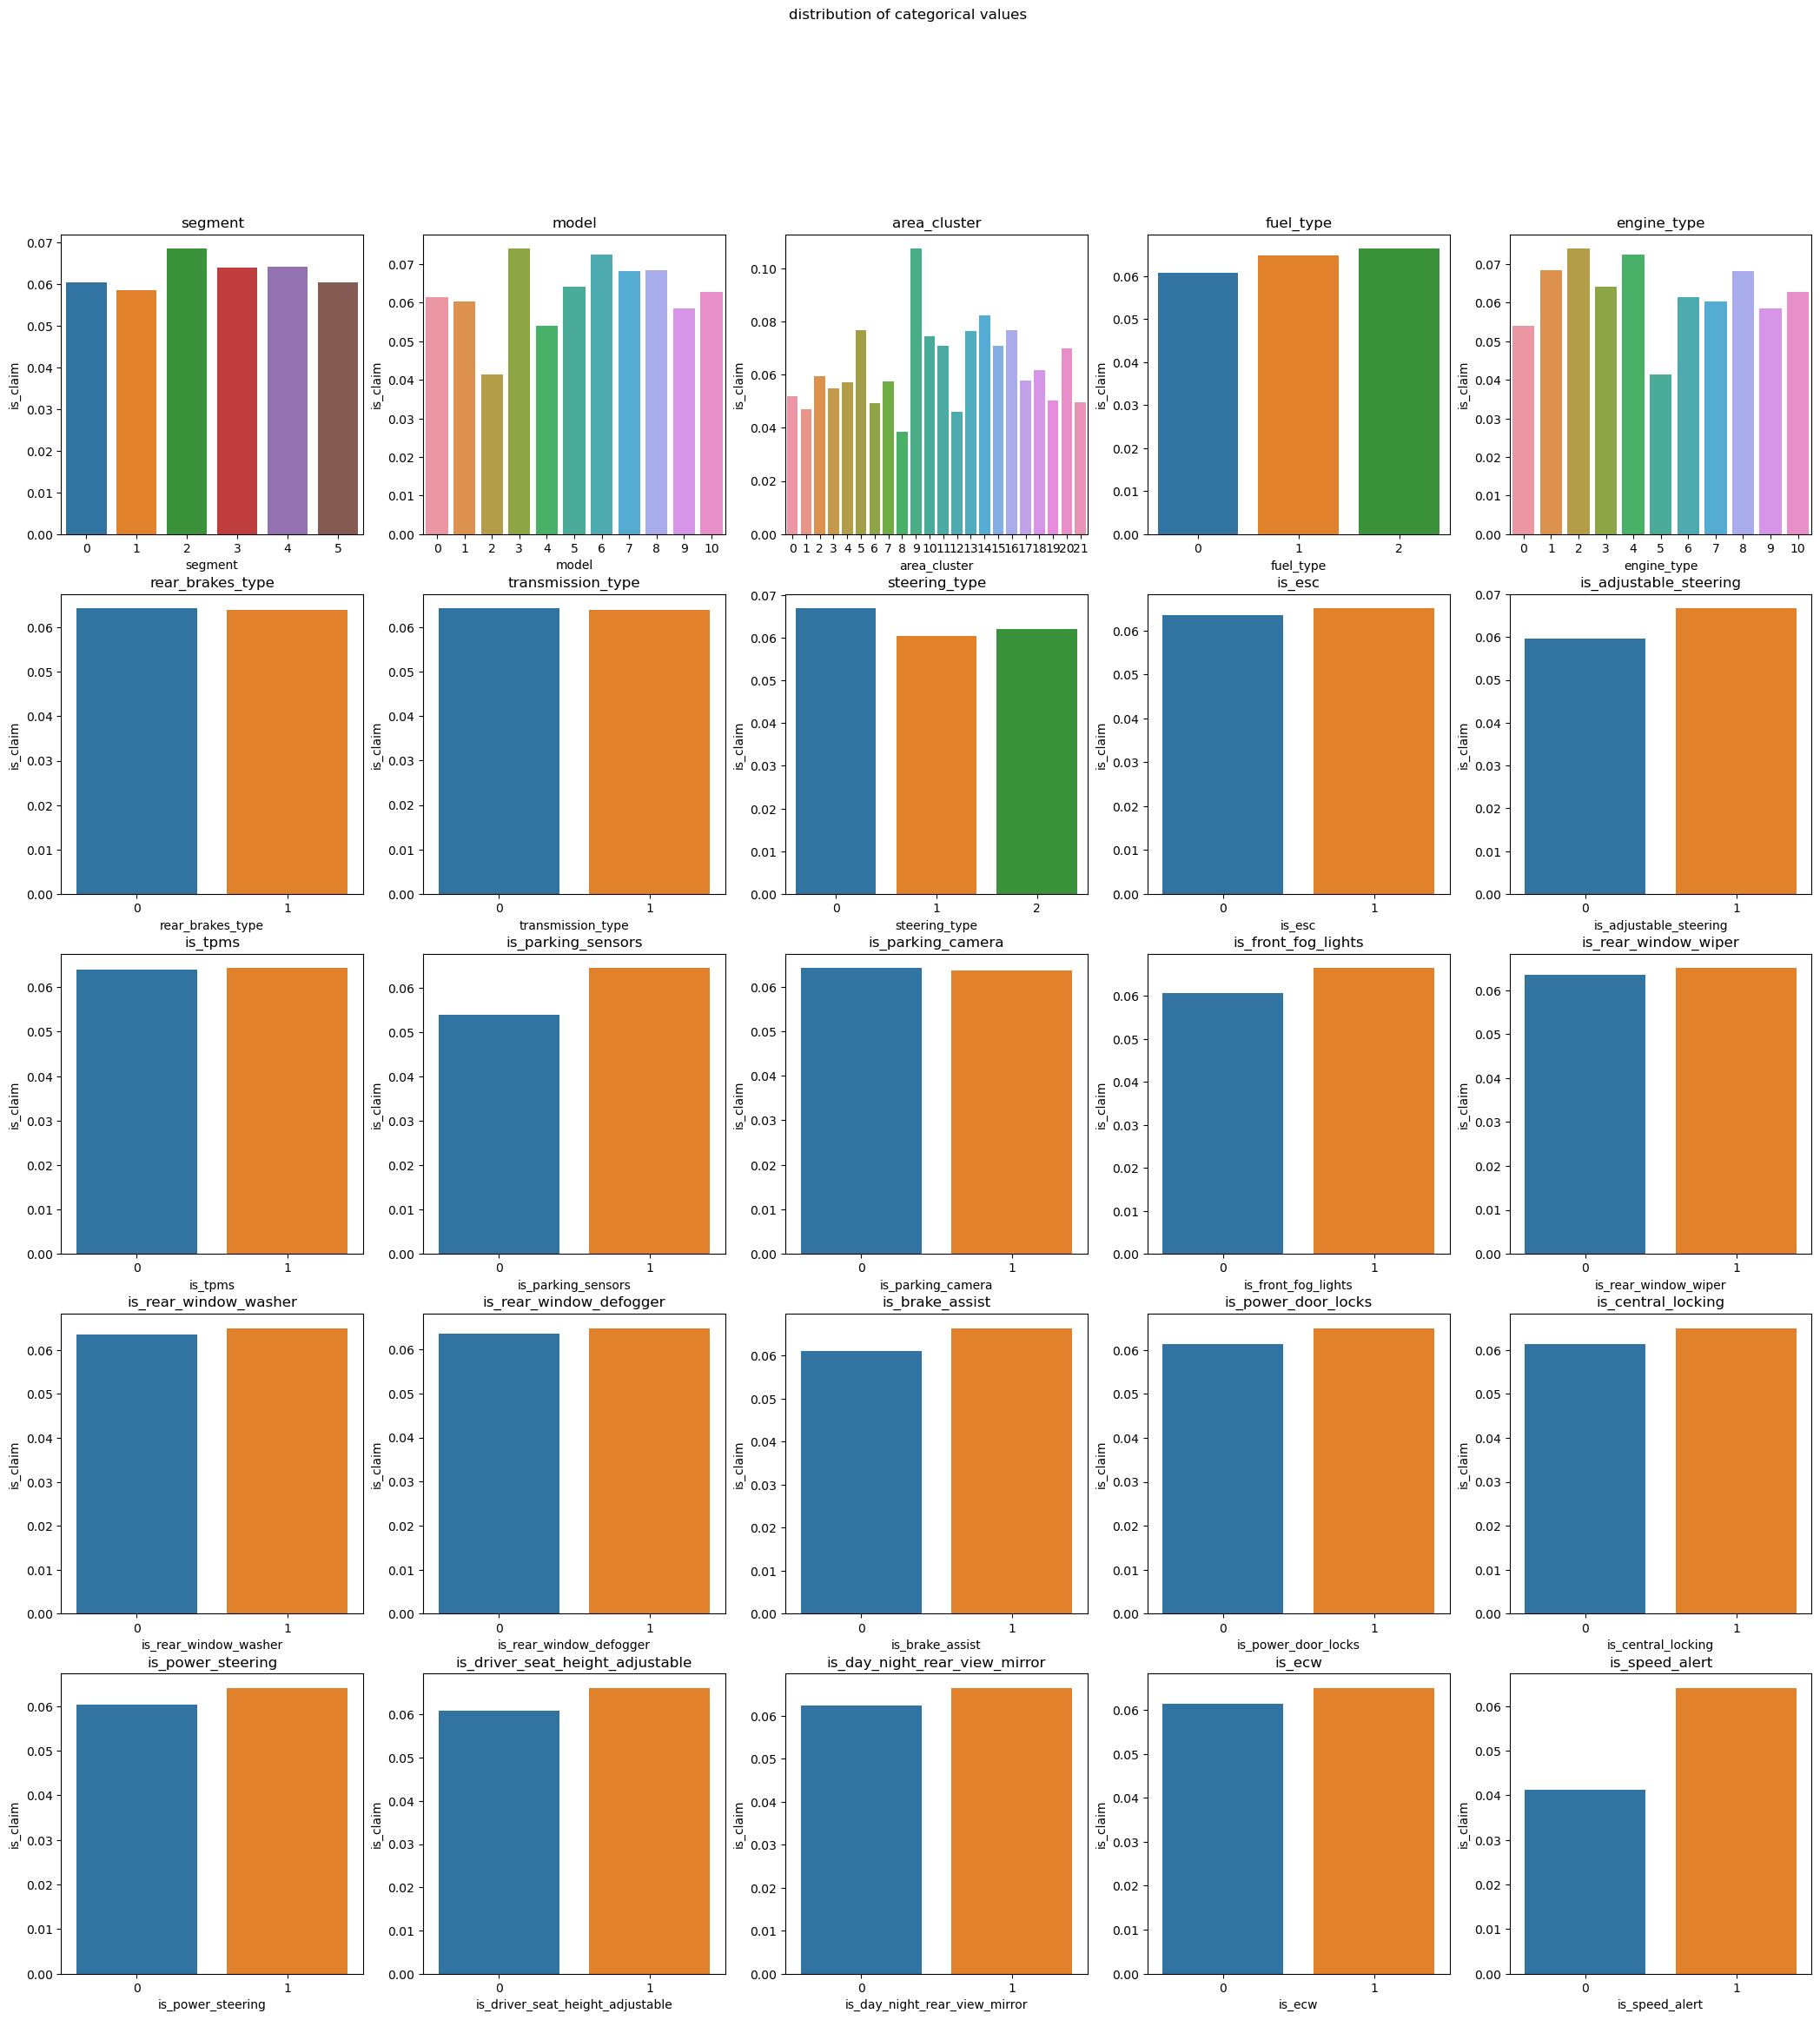

In [16]:
# make a plot for each categorical column
cat_list = ordinal_colums + dummy_columns
len(cat_list)

_ = plt.figure(figsize=(26,26))
_ = plt.tight_layout()
_ = plt.suptitle("distribution of categorical values")

for k, col in enumerate(df.loc[:, cat_list], start=1):
    ax = plt.subplot(5, 5, k)

    percent_df = pd.concat([
        df_is_not_claim[col].value_counts() / df[col].value_counts(),
        df_is_claim[col].value_counts() / df[col].value_counts(),
    ], axis=1)
    percent_df.columns = ["is_not_claim", "is_claim"]

    _ = sns.barplot(percent_df, x=percent_df.index, y=percent_df["is_claim"], ax=ax)
    _ = plt.title(col)


In [17]:
# _ = plt.figure(figsize=(26,26))
# _ = plt.tight_layout()
# _ = plt.suptitle("distribution of categorical values")

# for k, col in enumerate(df.loc[:, cat_list], start=1):
#     ax = plt.subplot(5, 5, k)

#     percent_df = pd.concat([
#         df_is_not_claim[col].value_counts() / df[col].value_counts(),
#         df_is_claim[col].value_counts() / df[col].value_counts(),
#     ], axis=1)
#     percent_df.columns = ["is_not_claim", "is_claim"]

#     _ = sns.barplot(percent_df, x=percent_df.index, y=percent_df["is_not_claim"], ax=ax)
#     _ = plt.title(col)


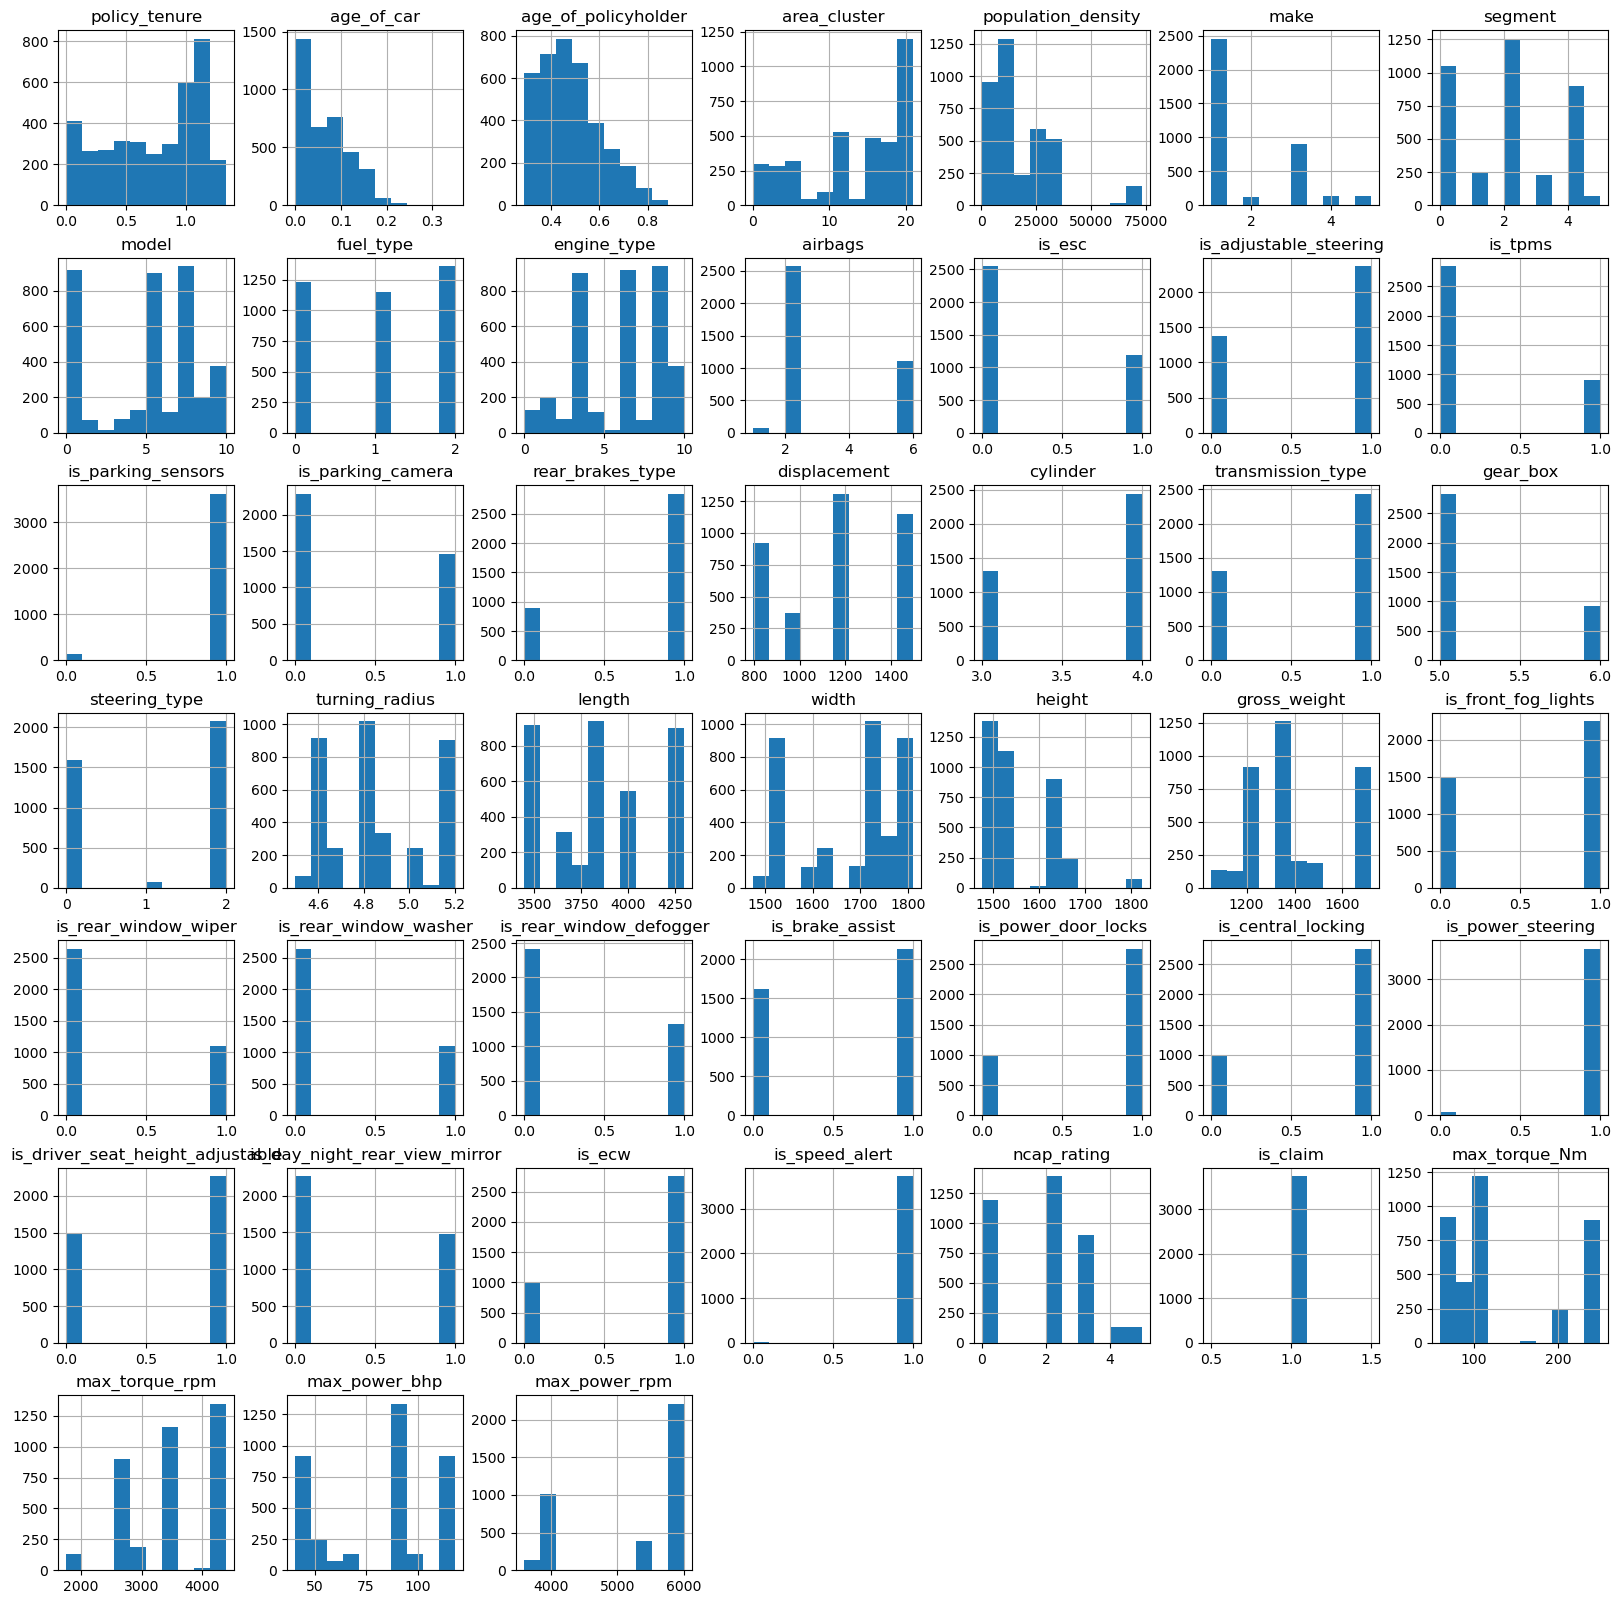

In [18]:
# to make a plot for each column for the is_claim
df_is_claim.hist(figsize=(20,20));

In [19]:
#build correlation matrix
plt.figure(figsize=(20,20))
corr = df.corr()
corr
corr.style.background_gradient(cmap='coolwarm').set_table_styles([dict(selector="th",props=[('max-width', '80px')])])
plt.show()


<Figure size 2000x2000 with 0 Axes>

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,...,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm
policy_tenure,1.000000,0.166312,0.143676,0.035666,-0.100307,0.086101,0.172310,0.200052,0.183302,-0.027675,...,0.191328,0.116186,0.229307,-0.010318,0.173280,0.078747,0.150604,0.019754,0.207171,-0.101081
age_of_car,0.166312,1.000000,-0.035427,0.049342,-0.062255,0.188122,0.360144,0.365221,0.341563,-0.081370,...,0.357716,0.194007,0.435211,-0.046551,0.348853,-0.028172,0.308669,0.017598,0.409716,-0.212649
age_of_policyholder,0.143676,-0.035427,1.000000,0.008967,0.009669,-0.031989,-0.022912,-0.049087,0.010322,0.005626,...,0.010981,0.003207,-0.038864,0.001643,-0.031628,0.022435,-0.015626,0.034706,-0.011833,0.037502
area_cluster,0.035666,0.049342,0.008967,1.000000,-0.315874,0.028358,0.066277,0.057495,0.050661,-0.006619,...,0.064862,0.019886,0.071584,-0.007578,0.059964,0.009425,0.058607,-0.001378,0.072825,-0.039437
population_density,-0.100307,-0.062255,0.009669,-0.315874,1.000000,-0.035125,-0.088443,-0.082640,-0.072647,0.013916,...,-0.091361,-0.038308,-0.096469,-0.004316,-0.071150,-0.017808,-0.075072,-0.000723,-0.096678,0.049189
make,0.086101,0.188122,-0.031989,0.028358,-0.035125,1.000000,0.609678,0.266116,0.059457,-0.296041,...,0.347099,-0.191371,0.414478,-0.155295,0.792254,-0.000456,0.829837,-0.772977,0.643805,-0.928112
segment,0.172310,0.360144,-0.022912,0.066277,-0.088443,0.609678,1.000000,0.440043,0.354273,-0.253818,...,0.745263,-0.004148,0.616333,-0.053501,0.666754,0.006366,0.869812,-0.426418,0.895179,-0.695596
model,0.200052,0.365221,-0.049087,0.057495,-0.082640,0.266116,0.440043,1.000000,0.598950,0.217447,...,0.599997,0.549804,0.884738,0.065668,0.612275,0.006548,0.369107,0.077804,0.599676,-0.304817
fuel_type,0.183302,0.341563,0.010322,0.050661,-0.072647,0.059457,0.354273,0.598950,1.000000,-0.149937,...,0.748370,0.845855,0.741440,-0.094221,0.405514,0.009612,0.256827,0.534691,0.627061,0.037743
engine_type,-0.027675,-0.081370,0.005626,-0.006619,0.013916,-0.296041,-0.253818,0.217447,-0.149937,1.000000,...,-0.108098,0.181104,-0.131482,0.014785,-0.072424,0.000927,-0.417765,0.124955,-0.319937,0.336704


,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm
policy_tenure,1.000000,0.166312,0.143676,0.035666,-0.100307,0.086101,0.172310,0.200052,0.183302,-0.027675,0.103981,0.105427,0.192941,0.094240,-0.016007,0.111614,-0.094240,0.194361,0.191185,-0.107626,0.095305,-0.115404,0.166426,0.190869,0.213228,0.119055,0.141027,0.189288,0.104055,0.104055,0.107545,0.184687,0.229307,0.229307,0.012695,0.191328,0.116186,0.229307,-0.010318,0.173280,0.078747,0.150604,0.019754,0.207171,-0.101081
age_of_car,0.166312,1.000000,-0.035427,0.049342,-0.062255,0.188122,0.360144,0.365221,0.341563,-0.081370,0.209073,0.225892,0.370190,0.194777,-0.023809,0.228212,-0.194777,0.393208,0.379522,-0.222238,0.201579,-0.212720,0.332716,0.383177,0.414104,0.259156,0.302127,0.349570,0.212699,0.212699,0.223579,0.350568,0.435211,0.435211,-0.018853,0.357716,0.194007,0.435211,-0.046551,0.348853,-0.028172,0.308669,0.017598,0.409716,-0.212649
age_of_policyholder,0.143676,-0.035427,1.000000,0.008967,0.009669,-0.031989,-0.022912,-0.049087,0.010322,0.005626,-0.008041,-0.014844,0.011201,-0.002840,0.026347,-0.039199,0.002840,-0.023764,0.004183,0.025091,-0.003115,0.000480,-0.016764,-0.020138,-0.006135,-0.053930,-0.007758,0.011219,-0.010025,-0.010025,-0.029205,0.025025,-0.038864,-0.038864,0.024265,0.010981,0.003207,-0.038864,0.001643,-0.031628,0.022435,-0.015626,0.034706,-0.011833,0.037502
area_cluster,0.035666,0.049342,0.008967,1.000000,-0.315874,0.028358,0.066277,0.057495,0.050661,-0.006619,0.041899,0.041577,0.063406,0.047580,0.007146,0.032781,-0.047580,0.067858,0.064070,-0.036298,0.048550,-0.019005,0.060992,0.068587,0.073746,0.054733,0.063403,0.063522,0.042334,0.042334,0.036483,0.068032,0.071584,0.071584,-0.000051,0.064862,0.019886,0.071584,-0.007578,0.059964,0.009425,0.058607,-0.001378,0.072825,-0.039437
population_density,-0.100307,-0.062255,0.009669,-0.315874,1.000000,-0.035125,-0.088443,-0.082640,-0.072647,0.013916,-0.060359,-0.059533,-0.090283,-0.057928,-0.010347,-0.051064,0.057928,-0.090983,-0.091591,0.054424,-0.056640,0.035758,-0.077501,-0.091968,-0.098156,-0.065583,-0.077816,-0.091856,-0.061081,-0.061081,-0.056505,-0.091824,-0.096469,-0.096469,0.001306,-0.091361,-0.038308,-0.096469,-0.004316,-0.071150,-0.017808,-0.075072,-0.000723,-0.096678,0.049189
make,0.086101,0.188122,-0.031989,0.028358,-0.035125,1.000000,0.609678,0.266116,0.059457,-0.296041,0.501800,0.487446,0.434879,0.609770,-0.042695,0.691456,-0.609770,0.753344,0.410672,-0.466939,0.632807,0.094661,0.753861,0.692365,0.511695,0.303274,0.481408,0.321692,0.499317,0.499317,0.689585,0.137287,0.414478,0.414478,0.097500,0.347099,-0.191371,0.414478,-0.155295,0.792254,-0.000456,0.829837,-0.772977,0.643805,-0.928112
segment,0.172310,0.360144,-0.022912,0.066277,-0.088443,0.609678,1.000000,0.440043,0.354273,-0.253818,0.669523,0.718573,0.745134,0.738033,0.254288,0.630953,-0.738033,0.923338,0.836156,-0.585981,0.741399,-0.039388,0.768477,0.909084,0.788757,0.722135,0.843551,0.735202,0.698636,0.698636,0.750433,0.688792,0.616333,0.616333,-0.283698,0.745263,-0.004148,0.616333,-0.053501,0.666754,0.006366,0.869812,-0.426418,0.895179,-0.695596
model,0.200052,0.365221,-0.049087,0.057495,-0.082640,0.266116,0.440043,1.000000,0.598950,0.217447,0.182974,0.136185,0.639006,0.059768,0.042361,0.235965,-0.059768,0.603161,0.596718,-0.125954,0.047277,-0.546235,0.393267,0.523375,0.691110,0.337391,0.237030,0.609179,0.171836,0.171836,0.258854,0.472969,0.884738,0.8

<Figure size 2000x2000 with 0 Axes>

# Models

In [20]:
df = train_df.copy()

# Ordinal encoding
# ordinal_encoder = preprocessing.OrdinalEncoder()
# df[ordinal_colums] = ordinal_encoder.fit_transform(df[ordinal_colums])

# Dummy encoding
df = pd.get_dummies(df, columns=dummy_columns + ordinal_colums, drop_first=True).replace({True: 1, False: 0})

# Split the data into train and validation
xy_train_df, xy_validation_df = model_selection.train_test_split(df, test_size=0.20)

# xy_train_df_is_claim_0 = xy_train_df[xy_train_df["is_claim"] == 0]
# xy_train_df_is_claim_1 = xy_train_df[xy_train_df["is_claim"] == 1]
# xy_train_df = pd.concat([
#     xy_train_df_is_claim_0,
#     resample(xy_train_df_is_claim_1, replace=True, n_samples=len(xy_train_df_is_claim_0))
# ])

x_train = xy_train_df.drop(columns=["is_claim"])
y_train = xy_train_df["is_claim"]
x_train, y_train = SMOTEENN().fit_resample(x_train, y_train)

x_val = xy_validation_df.drop(columns=["is_claim"])
y_val = xy_validation_df["is_claim"]

y_train.value_counts(), y_val.value_counts()


(is_claim
 1    32853
 0    26724
 Name: count, dtype: int64,
 is_claim
 0    10926
 1      793
 Name: count, dtype: int64)

In [21]:
# Create a pipeline
logistic_regression = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("logistic_regression", linear_model.LogisticRegression(
        max_iter=1000,
    ))
])
_ = logistic_regression.fit(x_train, y_train)


cross_validation = model_selection.KFold(n_splits=5, shuffle=True)
scores = model_selection.cross_val_score(logistic_regression, x_train, y_train, cv=cross_validation, scoring='f1')

print(metrics.classification_report(y_val, logistic_regression.predict(x_val)))

              precision    recall  f1-score   support

           0       0.96      0.49      0.64     10957
           1       0.08      0.67      0.15       762

    accuracy                           0.50     11719
   macro avg       0.52      0.58      0.40     11719
weighted avg       0.90      0.50      0.61     11719



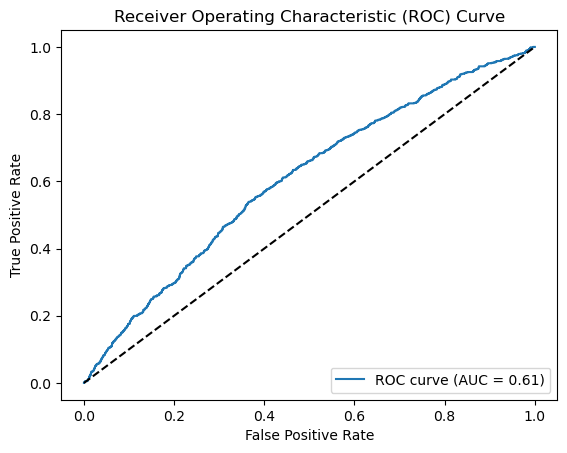

In [22]:
# Get the predicted probabilities for the positive class
y_pred_proba = logistic_regression.predict_proba(x_val)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred_proba)

# Calculate the area under the ROC curve (AUC)
auc = metrics.roc_auc_score(y_val, y_pred_proba)

# Plot the ROC curve
_ = plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
_ = plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('Receiver Operating Characteristic (ROC) Curve')
_ = plt.legend(loc='lower right')
plt.show()

In [23]:
# Random Forest

In [24]:
# Create a pipeline
ada_boost = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("adaboost", ensemble.AdaBoostClassifier(algorithm="SAMME")),
])
_ = ada_boost.fit(x_train, y_train)


cross_validation = model_selection.KFold(n_splits=5, shuffle=True)
scores = model_selection.cross_val_score(ada_boost, x_train, y_train, cv=cross_validation, scoring='f1')

print(metrics.classification_report(y_val, ada_boost.predict(x_val)))


              precision    recall  f1-score   support

           0       0.96      0.48      0.64     10957
           1       0.09      0.71      0.15       762

    accuracy                           0.49     11719
   macro avg       0.52      0.59      0.40     11719
weighted avg       0.90      0.49      0.61     11719



In [25]:
d_tree = ensemble.RandomForestClassifier()
d_tree.fit(x_train, y_train)
print(metrics.classification_report(y_val, d_tree.predict(x_val)))

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.94      0.80      0.87     10957
           1       0.09      0.28      0.14       762

    accuracy                           0.77     11719
   macro avg       0.52      0.54      0.50     11719
weighted avg       0.89      0.77      0.82     11719

